# Dataset preparation

The main purpose of this notebook - prepare convenient way to work with dataset. I think, the best way - using pandas DataFrame

In [64]:
import os
import operator
from pathlib import Path
import random
import json

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import cv2
from IPython.display import JSON
import tqdm.notebook as tqdm

## Dataset path

In [45]:
data_path = Path('/Data/')

In [46]:
classes = os.listdir(data_path)
print('Total classes: {}'.format(len(classes)))

Total classes: 1000


## Generate list of train files

In [52]:
img_ext = '.jpg'
mask_ext = '.png'

images_list = []
category_list = []
image_id = 0

for class_id, c in tqdm.tqdm(enumerate(classes)):
    category_list.append({
        'name': c,
        'id': class_id
    })
    
    for i in os.listdir(data_path / c):
        img_path = Path(i)
        if img_path.suffix != img_ext:
            continue
            
        img_basename = img_path.stem
        classname_path = Path(c)
        images_list.append(
        {
            'image': str(classname_path / f'{img_basename}{img_ext}'),
            'mask': str(classname_path / f'{img_basename}{mask_ext}'),
            'category_id': class_id,
            'id': image_id
        })
        
        image_id += 1
        
json_annotation = {
    'samples': images_list,
    'categories': category_list
}
JSON(json_annotation)

<IPython.core.display.JSON object>

In [54]:
total = 0

assert len(json_annotation['categories']) == 1000, 'No 100 categories'

for c in json_annotation['categories']:
    items_of_given_cat = len([x for x in json_annotation['samples'] if x['category_id'] == c['id']])
    assert items_of_given_cat == 10, f'Invalid number of items in category {c}'
    total += l
    
assert total == len(json_annotation['samples']), 'Mismatch image counts'

Prepare transparent cmap

In [55]:
ncolors = 256
color_array = plt.get_cmap('gist_rainbow')(range(ncolors))

color_array[:,-1] = np.linspace(0.0,1.0,ncolors)

map_object = LinearSegmentedColormap.from_list(name='rainbow_alpha',colors=color_array)

plt.register_cmap(cmap=map_object)

Plot samples with mask

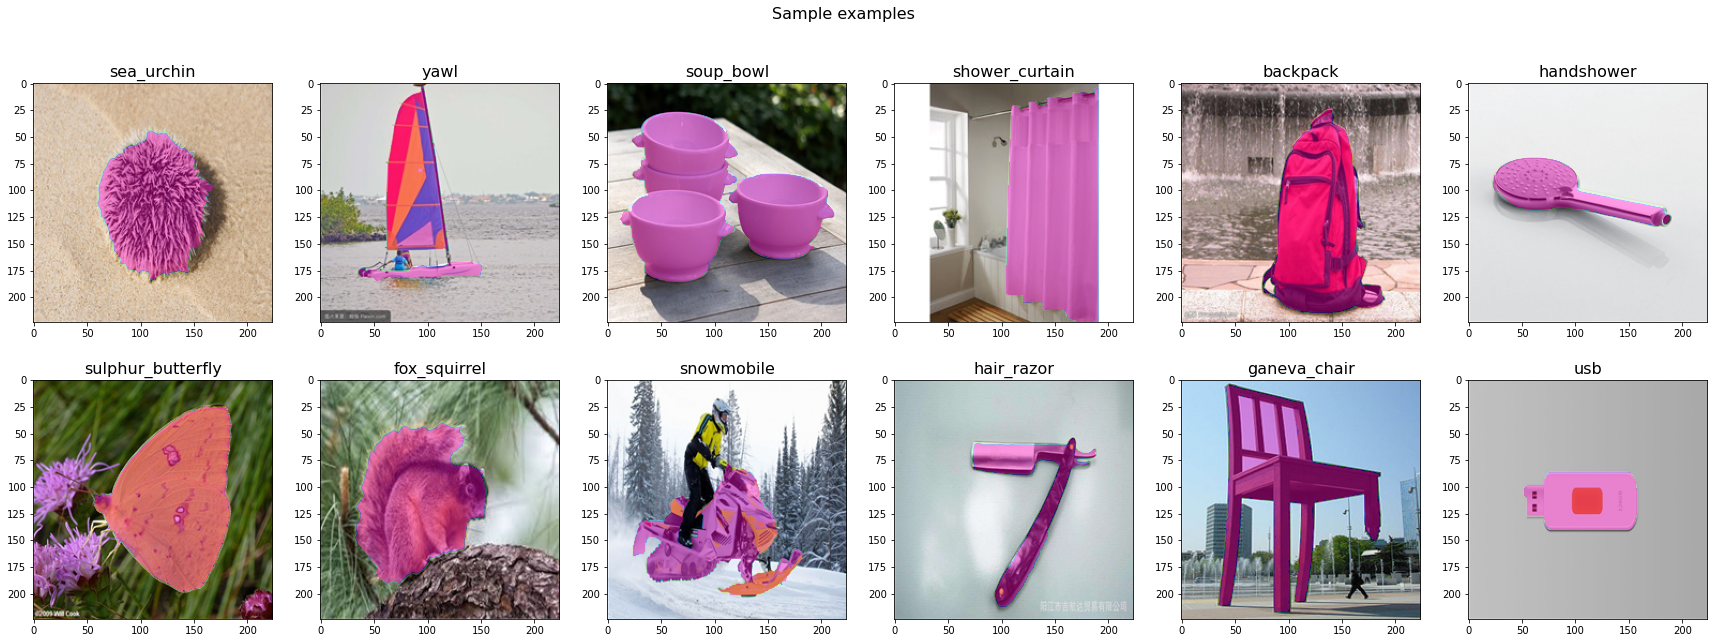

In [63]:
ncols = 6
nrows = 2
fig, ax = plt.subplots(ncols=ncols, nrows=nrows, figsize=(ncols*5, nrows*5))
fig.suptitle('Sample examples', fontsize=16)
ax = ax.flatten()

for idx, sample in enumerate(random.choices(json_annotation['samples'], k=ncols*nrows)):
    img = cv2.imread(str(data_path / sample['image']))
    mask = cv2.imread(str(data_path / sample['mask']), cv2.IMREAD_GRAYSCALE)
    
    ax[idx].imshow(img[:, :, ::-1])
    ax[idx].imshow(mask, cmap='rainbow_alpha', alpha=0.4)
    
    cat_name = [x['name'] for x in json_annotation['categories'] if x['id'] == sample['category_id']]
    assert len(cat_name) == 1, 'Multiple categories'
    
    ax[idx].set_title(cat_name[0], fontsize=16)

In [ ]:
save_path = Path('./annotations/samples.json')